In [1]:
import numpy as np
import math as math
import pandas as pd

In [3]:
city_data = pd.read_csv("worldcities.csv")

In [4]:
city_data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
29695,Shāhpur,Shahpur,23.8937,79.0507,India,IN,IND,Madhya Pradesh,NaN,16077.0,1356440946
29696,Porto Belo,Porto Belo,-27.1578,-48.5528,Brazil,BR,BRA,Santa Catarina,NaN,16083.0,1076716285
29697,Landen,Landen,50.7547,5.0814,Belgium,BE,BEL,Flanders,NaN,15961.0,1056582232
29698,Vero Beach,Vero Beach,27.6463,-80.3930,United States,US,USA,Florida,NaN,16254.0,1840015985


In [5]:
# Utilities
def to_spherical(x, y, z):
    theta = np.arcsin(z)*(180/np.pi);
    phi = np.sign(y)*np.arccos(x/np.sqrt(x**2 + y**2))*(180/np.pi)
    return (theta, phi)


def to_cartesian(theta, phi):
    theta = theta*np.pi/180
    phi = phi*np.pi/180
    x = np.cos(phi) * np.cos(theta)
    y = np.sin(phi) * np.cos(theta)
    z = np.sin(theta)
    return (x, y, z)

In [6]:
# Cartesian Coordinates of Data
NC = city_data.shape[0]
locations = np.zeros((NC,3)) 
for i in range(NC):
  lat = city_data.loc[i,"lat"]
  lng = city_data.loc[i,"lng"]
  locations[i,:] = to_cartesian(lat,lng)

In [7]:
# Debiased City Generation
np.random.seed(68410) # Class Seed!!!
N = 1000;

# Sample Random Locations
random_locations = np.random.normal(loc = 0.0, scale = 1.0, size = (N,3)) 
norms = np.linalg.norm(random_locations, axis = 1)
random_locations = random_locations/norms.reshape((N,1))

#Project to Actual Cities
inner_products = np.matmul(locations, random_locations.T)
random_cities = np.argmax(inner_products, axis = 0)

#Remove "Coastaal" Bias
tau = 0.99
debiased_random_cities =  []
for i in range(N):
  if inner_products[random_cities[i], i]>tau:
    debiased_random_cities.append(random_cities[i])
debiased_random_cities = np.array(debiased_random_cities)[:320]

debiased_locations     = locations[debiased_random_cities,:]
debiased_city_names    = city_data.loc[debiased_random_cities, "city"]
debiased_country_names = city_data.loc[debiased_random_cities, "country"]
debiased_city_names.to_csv(r'debiased_names.txt', header=None, index=None, sep=' ', mode='a')

In [8]:
# Biased City Generation
np.random.seed(68411) # Class Seed+1!!!
N = 320;

# Sample Random Locations
random_locations = np.random.normal(loc = 0.0, scale = 1.0, size = (N,3)) 
norms = np.linalg.norm(random_locations, axis = 1)
random_locations = random_locations/norms.reshape((N,1))

#Project to Actual Cities
inner_products = np.matmul(locations, random_locations.T)
biased_random_cities = np.argmax(inner_products, axis = 0)

biased_locations     = locations[biased_random_cities,:]
biased_city_names    = city_data.loc[biased_random_cities, "city"]
biased_country_names = city_data.loc[biased_random_cities, "country"]

In [9]:
# Uniform From Data Set
np.random.seed(68412) # Class Seed+2!!!
N = 320;
uniform_data_set_cities=np.random.randint(0,NC,N)
uniform_data_set_locations     = locations[uniform_data_set_cities,:]
uniform_data_set_city_names    = city_data.loc[uniform_data_set_cities, "city"]
uniform_data_set_country_names = city_data.loc[uniform_data_set_cities, "country"]

In [10]:
np.savetxt("debiased_city_loactions.txt",debiased_locations)
np.savetxt("biased_city_loactions.txt",biased_locations)
np.savetxt("uniform_data_set_city_loactions.txt",uniform_data_set_locations)

In [15]:
# Computng True Distances
import geopy.distance

debiased_locations_spherical = np.zeros((N, 2))
biased_locations_spherical = np.zeros((N, 2))
uniform_data_set_locations_spherical = np.zeros((N, 2))

for i in range(N):
  debiased_locations_spherical[i,:] = to_spherical(debiased_locations[i,0],debiased_locations[i,1],debiased_locations[i,2])
  biased_locations_spherical[i,:] = to_spherical(biased_locations[i,0],biased_locations[i,1],biased_locations[i,2])
  uniform_data_set_locations_spherical[i,:] = to_spherical(uniform_data_set_locations[i,0],uniform_data_set_locations[i,1],uniform_data_set_locations[i,2])                                                                                                                            

In [16]:
np.savetxt("debiased_city_loactions_spherical.txt",debiased_locations_spherical)
np.savetxt("biased_city_loactions_spherical.txt",biased_locations_spherical)
np.savetxt("uniform_data_set_city_loactions_spherical.txt",uniform_data_set_locations_spherical)

In [ ]:
pip install geopandas

In [19]:
import matplotlib.pyplot as plt
import geopandas as gpd

<ipython-input-21-25f102e11518>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


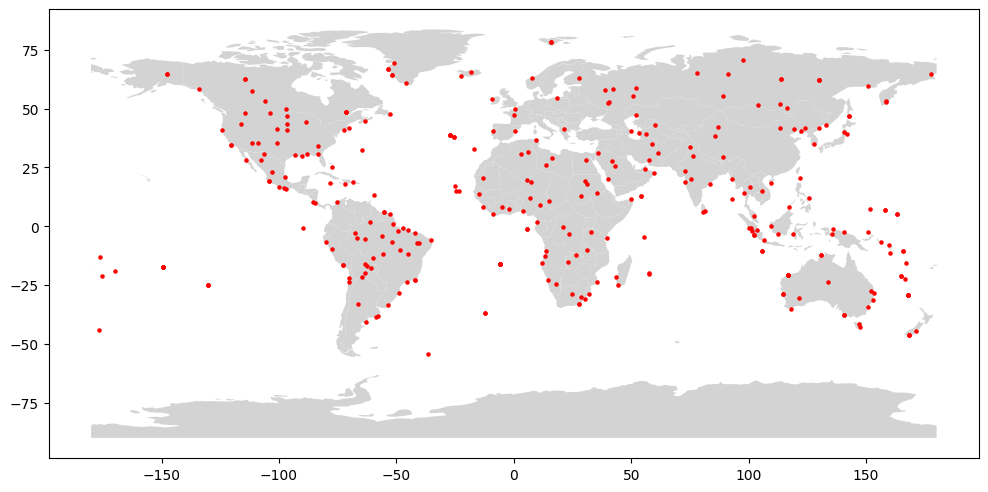

In [21]:
# Creating axes and plotting world map
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(debiased_locations_spherical[:320,1],
            debiased_locations_spherical[:320,0],
            color = "red",s = 5)
plt.savefig("debiased_all_locations.png")

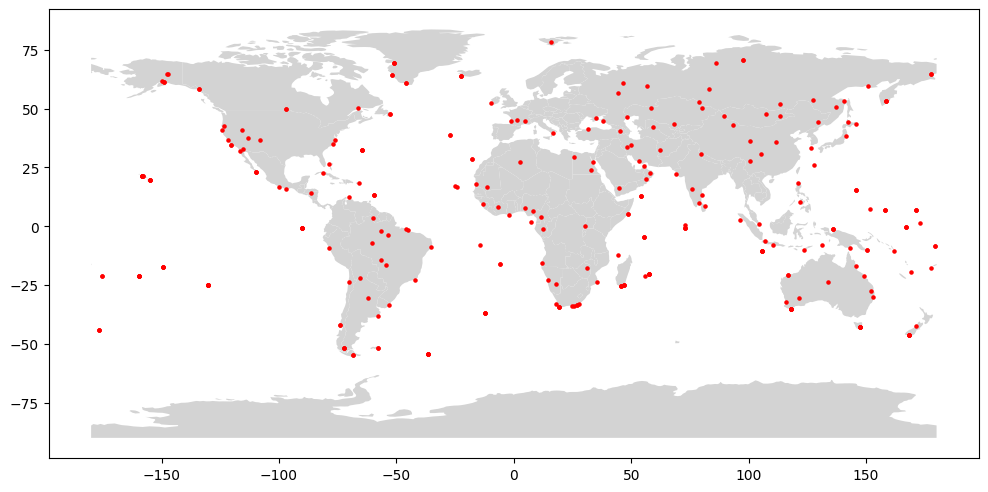

In [22]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(biased_locations_spherical[:320,1],
            biased_locations_spherical[:320,0],
            color = "red",s = 5)
plt.savefig("biased_all_locations.png")

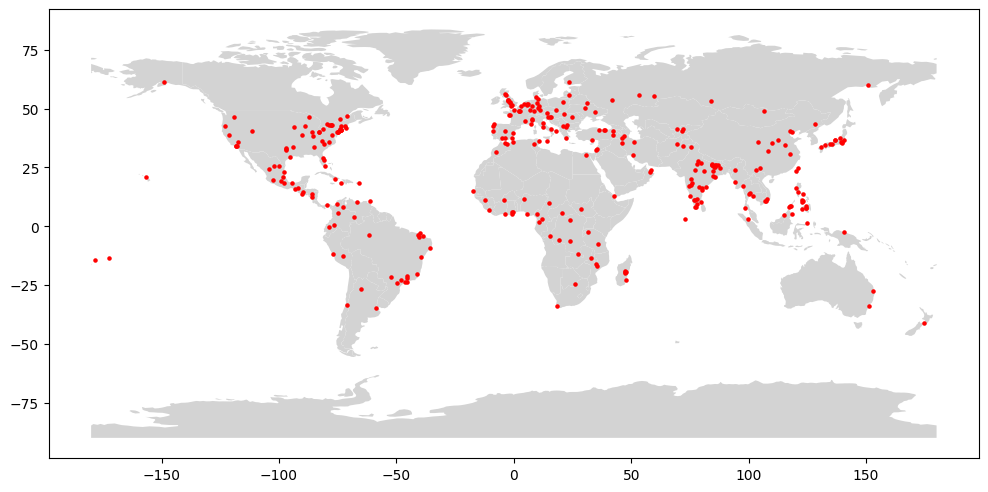

In [23]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(uniform_data_set_locations_spherical[:320,1],
            uniform_data_set_locations_spherical[:320,0],
            color = "red",s = 5)
plt.savefig("uniform_data_set_all_locations.png")